In [19]:
%matplotlib notebook
import pandas as pd
import matplotlib
from matplotlib.widgets import Slider
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(color_codes=True)
sns.set_style("darkgrid")

In [7]:
Another one for f(X) = 3x^2 - 25x -2
def equationf(x):
    f = 3*x**2 - 25*x - 2
    return f

SyntaxError: invalid syntax (<ipython-input-7-a290aafc7f82>, line 1)

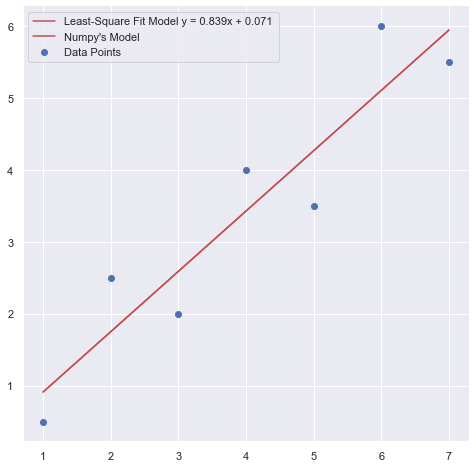

          x     y   Mean Err  Line Fit Err  y(numpy model)    x*y    x*2
0       1.0   0.5   8.576531      0.168686        0.910714    0.5    1.0
1       2.0   2.5   0.862245      0.562500        1.750000    5.0    4.0
2       3.0   2.0   2.040816      0.347258        2.589286    6.0    9.0
3       4.0   4.0   0.326531      0.326531        3.428571   16.0   16.0
4       5.0   3.5   0.005102      0.589605        4.267857   17.5   25.0
5       6.0   6.0   6.612245      0.797194        5.107143   36.0   36.0
6       7.0   5.5   4.290816      0.199298        5.946429   38.5   49.0
Total  28.0  24.0  22.714286      2.991071       24.000000  119.5  140.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The Standard Deviation is 1.9456912102680337
The Standard Error of Estimate 0.7734431367038469
Correclation Coefficient 0.6024841287136723
Least-Square Fit Model y = 0.839x + 0.071


In [9]:
fig= plt.figure(figsize=(8,8))
ax = plt.subplot()
sns.despine()


x = np.array([1,2,3,4,5,6,7])
y = np.array([0.5,2.5,2,4,3.5,6,5.5])

n = len(x)

# Least Square Fit
a1 = (len(x) * np.sum(x*y) - np.sum(x) * np.sum(y)) / (len(x)*np.sum(x*x) - np.sum(x) ** 2)
a0 = np.sum(y)/len(y) - a1*np.sum(x)/len(x)
yapprox = a0 + a1*x

line1, = plt.plot(x,yapprox,'r', label=f"Least-Square Fit Model y = {np.round(a1,3)}x + {np.round(a0,3)} ")
plt.scatter(x,y, label="Data Points")

#using numpy's own model of regression which should in theory be the same as the calculations
model = np.polyfit(x,y,1)
line2, = plt.plot(x,np.poly1d(model)(x), 'r',label = "Numpy's Model")
plt.legend()
plt.show()


df = pd.DataFrame({
    'x':x,
    'y':y,
    'Mean Err': (y-np.sum(y)/len(y))**2,
    'Line Fit Err': (y -yapprox )**2,
    'y(numpy model)':np.poly1d(model)(x),
    'x*y' : x*y,
    'x*2' : x**2,
    
})

st = np.sqrt(np.sum((y-np.sum(y)/len(y))**2)/(n-1))
sr = np.sqrt(np.sum((y -yapprox )**2)/(n-2))
df.loc['Total',:]= df.sum(axis=0)
print(df)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(f'The Standard Deviation is {st}')
print(f'The Standard Error of Estimate {sr}')
print(f'Correclation Coefficient {(st-sr)/st}')
print(f'Least-Square Fit Model y = {np.round(a1,3)}x + {np.round(a0,3)}')

<ipython-input-10-424350e991e7>:12: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)


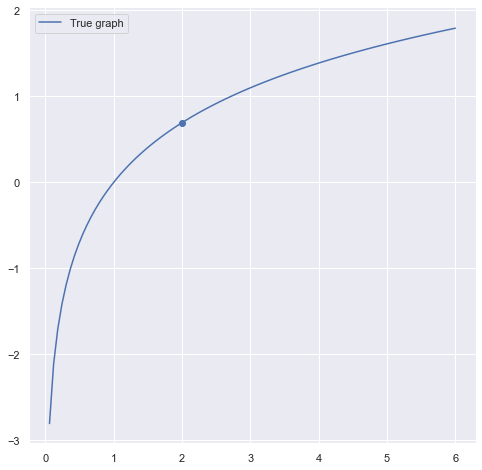

Empty DataFrame
Columns: []
Index: [Total]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The Standard Deviation is 1.9456912102680337
The Standard Error of Estimate 0.7734431367038469
Correclation Coefficient 0.6024841287136723
Least-Square Fit Model y = 0.839x + 0.071


In [10]:
fig= plt.figure(figsize=(8,8))
ax = plt.subplot()
sns.despine()


xaxis = np.linspace(0,6,100)


# y = np.array([0.5,2.5,2,4,3.5,6,5.5])

def equationf(x):
    y = np.log(x)
    return y







line1, = plt.plot(xaxis,equationf(xaxis), label = "True graph")
line2 = plt.scatter(2,equationf(2))
plt.legend()
plt.show()


df = pd.DataFrame({

})
    
st = np.sqrt(np.sum((y-np.sum(y)/len(y))**2)/(n-1))
sr = np.sqrt(np.sum((y -yapprox )**2)/(n-2))
df.loc['Total',:]= df.sum(axis=0)
print(df)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(f'The Standard Deviation is {st}')
print(f'The Standard Error of Estimate {sr}')
print(f'Correclation Coefficient {(st-sr)/st}')
print(f'Least-Square Fit Model y = {np.round(a1,3)}x + {np.round(a0,3)}')

<ipython-input-11-6a5c0a0c6cf2>:12: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)


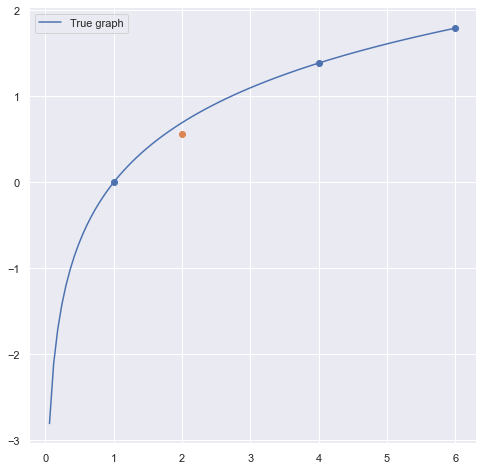

Empty DataFrame
Columns: []
Index: [Total]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The approximated value is 0.5658441999999999 compared to the real value of 0.6931471805599453
Therefore the error is 18.365937874421732


In [11]:
fig= plt.figure(figsize=(8,8))
ax = plt.subplot()
sns.despine()


x = [1,4,6]
y = [0,1.386294,1.791759]



def equationf(x):
    y = np.log(x)
    return y





def getquadinterpolation(x,y, val):
    x1 = x[0]
    x2 =x[1]
    x3 = x[2]
    
    
    b0 = y[0]
    b1 = (y[1]-y[0])/(x[1]-x[0])
    
    b2 = (  (y[2]-y[1])/(x[2]-x[1]) -   (y[1]-y[0])/(x[1]-x[0])     )/(x[2]-x[0])

    
    y = b0 + b1*(val - x[0]) + b2*(val - x[0])*(val - x[1])
    return y

approx = getquadinterpolation(x,y, 2)

line1, = plt.plot(xaxis,equationf(xaxis), label = "True graph")
line2 = plt.scatter(x,y)
line3 = plt.scatter(2,approx)
plt.legend()
plt.show()


# df = pd.DataFrame({

# })
    
# st = np.sqrt(np.sum((y-np.sum(y)/len(y))**2)/(n-1))
# sr = np.sqrt(np.sum((y -yapprox )**2)/(n-2))
# df.loc['Total',:]= df.sum(axis=0)
print(df)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(f'The approximated value is {approx} compared to the real value of {equationf(2)}')
print(f"Therefore the error is {(equationf(2) - approx)/equationf(2) * 100}")

<ipython-input-12-9679487a4b61>:12: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)


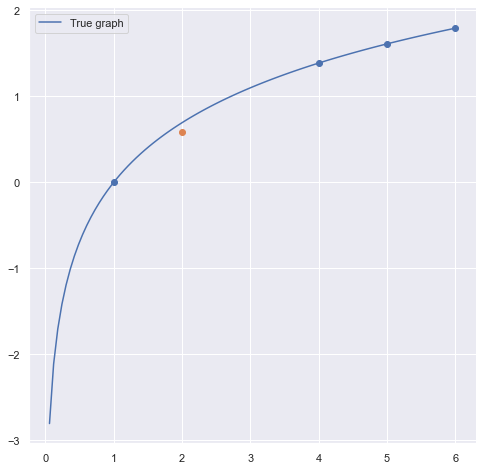

Empty DataFrame
Columns: []
Index: [Total]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The approximated value is 0.581575 compared to the real value of 0.6931471805599453
Therefore the error is 16.096463159500114


In [12]:
fig= plt.figure(figsize=(8,8))
ax = plt.subplot()
sns.despine()


x = [1,4,5 , 6]
y = [0,1.386294, 1.609438, 1.791759]



def equationf(x):
    y = np.log(x)
    return y



def getquadinterpolation(x,y, val):
    x1 = x[0]
    x2 =x[1]
    x3 = x[2]
    
    
    b0 = y[0]
    b1 = (y[1]-y[0])/(x[1]-x[0])
    
    b2 = (  (y[2]-y[1])/(x[2]-x[1]) -   (y[1]-y[0])/(x[1]-x[0])     )/(x[2]-x[0])

    
    y = b0 + b1*(val - x[0]) + b2*(val - x[0])*(val - x[1])
    return y



def generalinterpolation(x,y, n):
    i = 0
    
    first = []
    
    while i <=n:
        
        first[i] = (y[i+1] - y[i])/(x[i+1] - x[i])
    

approx = getquadinterpolation(x,y, 2)

line1, = plt.plot(xaxis,equationf(xaxis), label = "True graph")
line2 = plt.scatter(x,y)
line3 = plt.scatter(2,approx)
plt.legend()
plt.show()


# df = pd.DataFrame({

# })
    
# st = np.sqrt(np.sum((y-np.sum(y)/len(y))**2)/(n-1))
# sr = np.sqrt(np.sum((y -yapprox )**2)/(n-2))
# df.loc['Total',:]= df.sum(axis=0)
print(df)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(f'The approximated value is {approx} compared to the real value of {equationf(2)}')
print(f"Therefore the error is {(equationf(2) - approx)/equationf(2) * 100}")

In [46]:

linespace = np.linspace(0,50,1000)

ysource = [12,32,47,54,59,70]
xsource = [0,4,22,34,47,76]


y = [32,47,54,59]
x = [4,22,34,47]

# y = [12,32,47,54]
# x = [0,4,22,34]

# y = [47,54,59,70]
# x = [22,34,47,76]




def generalinterpolation(x,y, n,val):
    i = 0
    
    first = []
    second = []
    third = []
    while i <n:
        first.append((y[i+1] - y[i])/(x[i+1] - x[i]))
        i = i+1
    i=0
    while i<n-1:
        second.append((first[i+1] - first[i])/(x[i+2] - x[i]))
        i = i+1
        
    third.append((second[1] - second[0])/(x[n]-x[0]))   
    b0 = y[0]
    b1 = first[0]
    b2 = second[0]
    b3 = third[0]
    y = b0+b1*(val - x[0]) + b2*(val - x[0])*(val - x[1])+ b3*(val - x[0])*(val - x[1])*(val - x[2])
    print(first)
    print(second)
    print(third)
    print(y)
    return y


In [38]:

# y = [12,32,47,54]
# x = [0,4,22,34]

approx = generalinterpolation(x,y, 3, 25)

[5.0, 0.8333333333333334, 0.5833333333333334]
[-0.18939393939393942, -0.008333333333333333]
[0.005325311942959003]
45.955548128342244


In [15]:
# print(f'The approximated value is {approx} compared to the real value of {equationf(2)}')
# print(f"Therefore the error is {(equationf(2) - approx)/equationf(2) * 100} %")

<IPython.core.display.Javascript object>


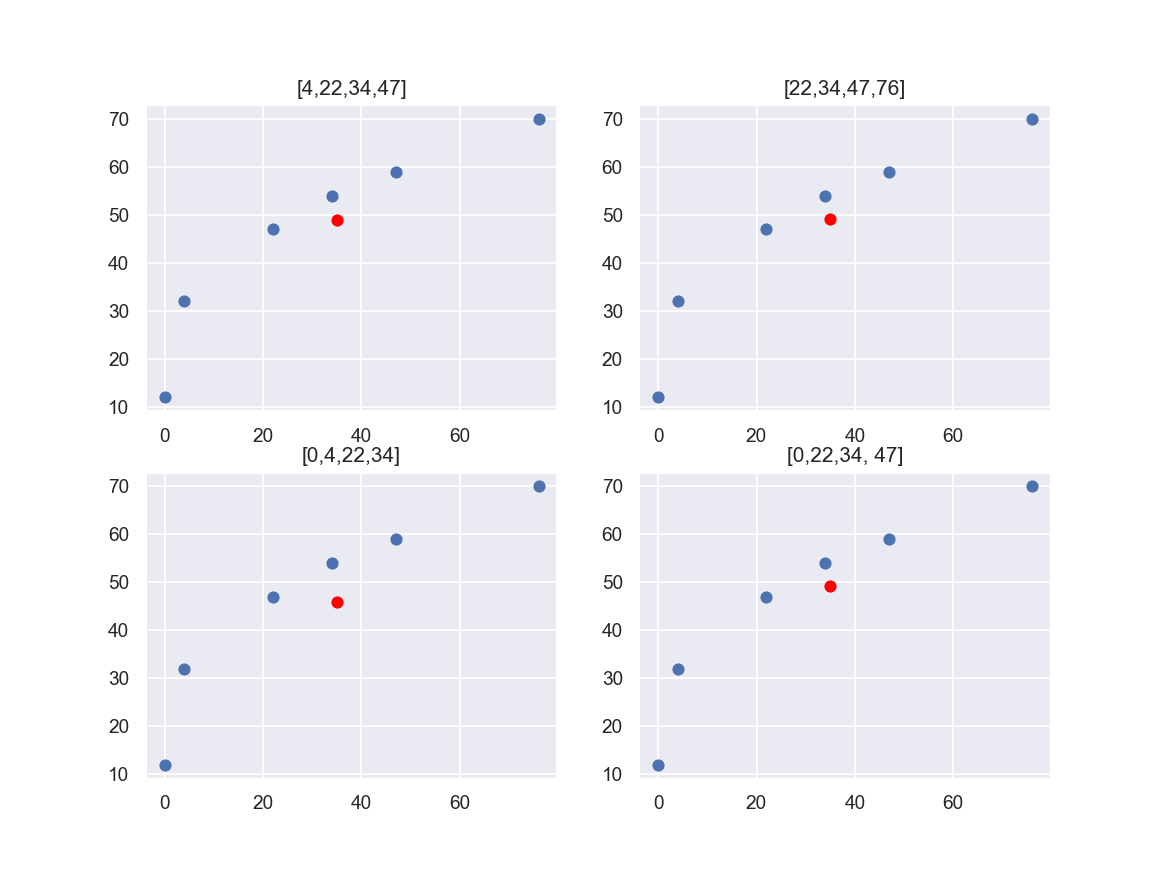

[0.8333333333333334, 0.5833333333333334, 0.38461538461538464]
[-0.008333333333333333, -0.007948717948717949]
[8.94454382826475e-06]
48.96992844364937
[5.0, 0.8333333333333334, 0.5833333333333334]
[-0.18939393939393942, -0.008333333333333333]
[0.005325311942959003]
45.955548128342244
[0.5833333333333334, 0.38461538461538464, 0.3793103448275862]
[-0.007948717948717949, -0.0001263104711380583]
[0.00014485939773296094]
49.050661866868765
[1.5909090909090908, 0.5833333333333334, 0.38461538461538464]
[-0.029634581105169335, -0.007948717948717949]
[0.0004614013437542848]
49.238687782805435


In [49]:
fig, ax = plt.subplots(2,2)


# ysource = [12,32,47,54,59,70]
# xsource = [0,4,22,34,47,76]


y1 = [32,47,54,59]
x1 = [4,22,34,47]

y2 = [12,32,47,54]
x2 = [0,4,22,34]

y3 = [47,54,59,70]
x3 = [22,34,47,76]


y4 = [12,47,54, 59]
x4 = [0,22,34, 47]




ax[0,0].set_title("[4,22,34,47]")
ax[0,0].scatter(xsource,ysource , label = " Source Data")
ax[0,0].scatter(35,generalinterpolation(x1,y1, 3, 25) , Color = 'red' , label = "Approximated Value")



ax[1,0].set_title("[0,4,22,34]")
ax[1,0].scatter(xsource,ysource , label = " Source Data")
ax[1,0].scatter(35,generalinterpolation(x2,y2, 3, 25) , Color = 'red' , label = "Approximated Value")


ax[0,1].set_title("[22,34,47,76]")
ax[0,1].scatter(xsource,ysource , label = " Source Data")
ax[0,1].scatter(35,generalinterpolation(x3,y3, 3, 25) , Color = 'red' , label = "Approximated Value")


ax[1,1].set_title("[0,22,34, 47]")
ax[1,1].scatter(xsource,ysource , label = " Source Data")
ax[1,1].scatter(35,generalinterpolation(x4,y4, 3, 25) , Color = 'red' , label = "Approximated Value")



# plt.legend()
plt.show()